In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('./data/global_unemployment_data.csv')

df.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


Inicialmente, vamos checar o tipo de cada coluna do dataset, convertendo-as para que seja possível utilizar menos memória

In [4]:
df.dtypes

country_name       object
indicator_name     object
sex                object
age_group          object
age_categories     object
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
dtype: object

In [5]:
#Convertendo colunas do tipo object para category
for column in df.columns: 
    if df[column].dtypes == 'object': 
        df[column] = df[column].astype('category')

df.dtypes

country_name      category
indicator_name    category
sex               category
age_group         category
age_categories    category
2014               float64
2015               float64
2016               float64
2017               float64
2018               float64
2019               float64
2020               float64
2021               float64
2022               float64
2023               float64
2024               float64
dtype: object

Uma vez que os tipos dos dados foram ajustados, vamos verificar a presença de valores nulos 

In [6]:
df.isnull().sum()

country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [7]:
df.bfill(axis='index', inplace=True)

df.isnull().sum()

country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64

Agora vamos conferir a distribuição dos dados

In [8]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.382729,10.052745,10.010014
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.254078,9.958798,9.949455
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.568500,3.484500,3.484500
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.624500,6.505000,6.495000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.498250,13.089250,12.941000
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


In [9]:
print("Quantidade de países:", len(df.country_name.unique()))

Quantidade de países: 189


In [13]:
age_categories = df['age_categories'].value_counts()
age_group = df['age_group'].value_counts()
sex = df['sex'].value_counts()

print("---------DISTRIBUIÇÃO DOS DADOS---------")
print(age_categories)
print()
print(age_group)
print()
print(sex)

---------DISTRIBUIÇÃO DOS DADOS---------
age_categories
Adults      378
Children    378
Youth       378
Name: count, dtype: int64

age_group
15-24       378
25+         378
Under 15    378
Name: count, dtype: int64

sex
Female    567
Male      567
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


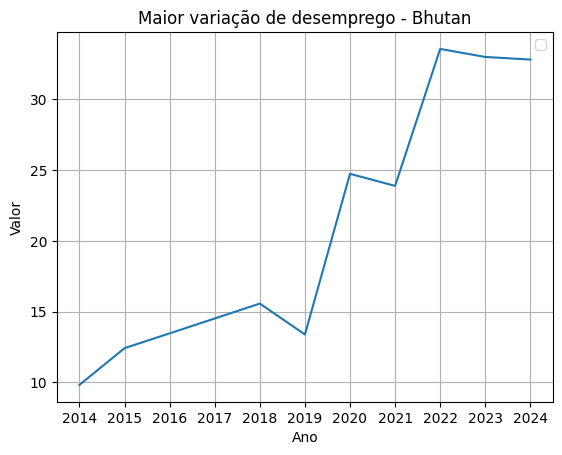

In [47]:
df['variation_between_2014_2024'] = df['2024'] - df['2014']

years = [str(year) for year in range(2014, 2025)]

plot = df.loc[df['variation_between_2014_2024'].idxmax()]

sns.lineplot(data=plot[years])

plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title(f'Maior variação de desemprego - {plot['country_name']}')
plt.legend() 

plt.grid(True)
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


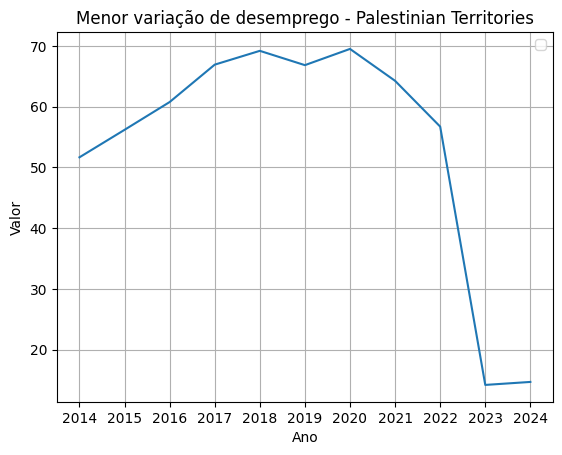

In [96]:
new_plot = df.loc[df['variation_between_2014_2024'].idxmin()]

sns.lineplot(data=new_plot[years])

plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title(f'Menor variação de desemprego - {new_plot['country_name']}')
plt.legend() 

plt.grid(True)
plt.show()

In [88]:
max_values = []

for year in years: 
    max_index = df[year].idxmax()
    min_index = df[year].idxmin()
    
    country = df.loc[max_index, 'country_name']
    value = df.loc[max_index, year]

    country_min = df.loc[min_index, 'country_name']
    value_min = df.loc[min_index, year]

    max_values.append((year, country, value, country_min, value_min))

max_values = pd.DataFrame(max_values, columns=['year', 'country', 'max_value', 'country_min', 'value_min'])

max_values

,year,country,max_value,country_min,value_min
0,2014,Djibouti,74.485,Qatar,0.027
1,2015,Djibouti,74.655,Qatar,0.034
2,2016,Djibouti,74.720,Qatar,0.038
3,2017,Djibouti,75.416,Qatar,0.035
4,2018,Djibouti,76.395,Qatar,0.044
5,2019,Djibouti,77.173,Cambodia,0.036
6,2020,Djibouti,83.990,Qatar,0.056
7,2021,Djibouti,82.135,Qatar,0.064
8,2022,Djibouti,78.776,Qatar,0.067
9,2023,Djibouti,78.541,Qatar,0.063


<Axes: xlabel='year', ylabel='max_value'>

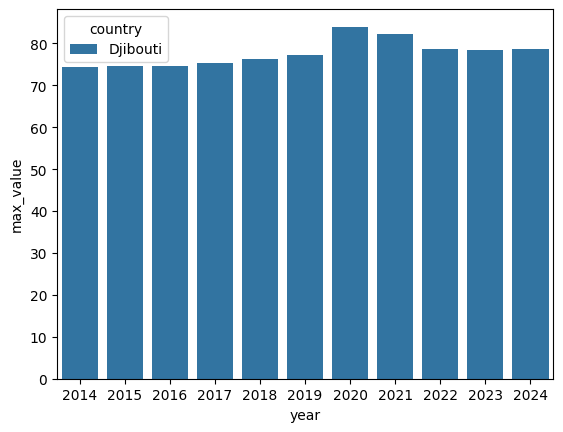

In [89]:
sns.barplot(data=max_values, y='max_value', x='year', hue='country')

Como mostra o gráfico acima, o País Djibouti obteve os maiores indíces de desemprego no mundo todo

<Axes: xlabel='year', ylabel='value_min'>

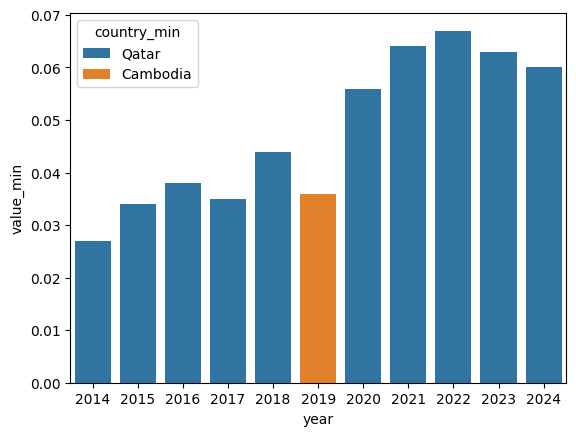

In [90]:
sns.barplot(data=max_values, y='value_min', x='year', hue='country_min')

O gráfico acima mostra os países que tiveram os menores indíces de desemprego. 

In [91]:
values = []
values_min = []

for year in years: 
    aux = []
    for country in df['country_name'].unique(): 
        aux.append((df[df['country_name'] == country][year].mean(), country, year))
    
    values.append(max(aux))
    values_min.append(min(aux))

<Axes: xlabel='year', ylabel='value'>

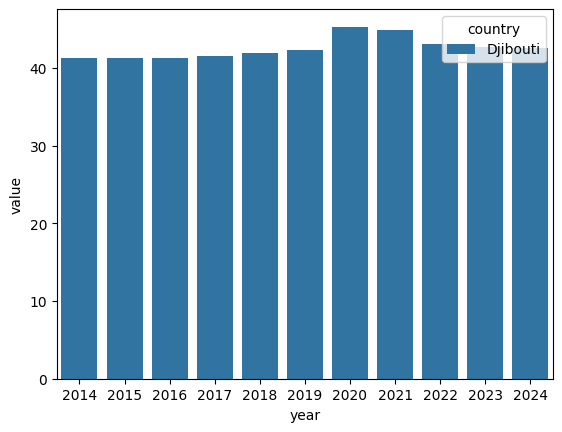

In [92]:
values = pd.DataFrame(values, columns=['value', 'country', 'year'])

sns.barplot(data=values, y='value', x='year', hue='country')

O gráfico acima mostra que o país Djibouti também obteve a maior média de desemprego global

<Axes: xlabel='year', ylabel='value'>

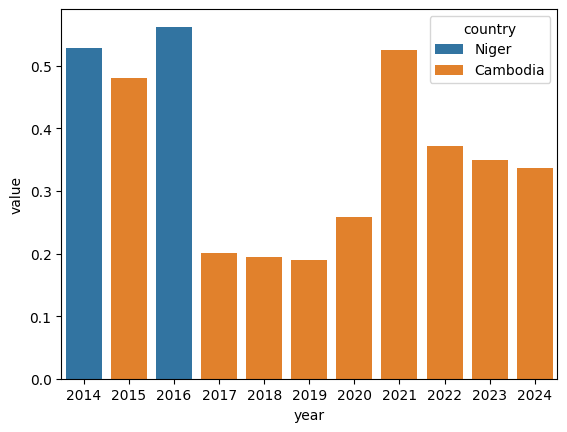

In [93]:
values = pd.DataFrame(values_min, columns=['value', 'country', 'year'])

sns.barplot(data=values, y='value', x='year', hue='country')

O gráfico acima apresenta os países que tiveram a menor média de desemprego global 

In [106]:
values_std = []
values_std = []

for year in years: 
    aux = []
    for country in df['country_name'].unique(): 
        aux.append((df[df['country_name'] == country][year].std(), country, year))
    
    values_std.append(max(aux))
    #values_min_std.append(min(aux))

In [111]:
aux = []
for country in df['country_name'].unique(): 
    aux.append((df[df['country_name'] == country]['2014'].std(), country))
    
min(aux) 

(0.173761522399715, 'Niger')